# Analyzing GC content in DNA sequences using Python

#### GC content, the percentage of guanines and cytosines in a DNA molecule, is one of the most important features of the genome. By performing an analysis based on the programming language Python we are able to calculate the GC content of any DNA sequence.

  •	A GC base pair consists of three hydrogen bonds, while an AT pair has only two. Owing to this, GC base pairs acquire higher stability, and a higher temperature is required to break the bonds. A high GC content therefore implies a high melting temperature of DNA, and thus demonstrates that GC content has a high influence on the stability of a DNA molecule.

  • A high variability in GC content (25% to 75%) is often observed among prokaryotes, and is therefore useful in phylogenetic analysis. In particular, thermophilic bacteria tend to have a higher GC content, possibly as an adaption against DNA denaturation under high temperatures.  

  •	As GC content affects the annealing temperatures in a PCR experiment, high GC content leads to complications with primer design.

  •	High GC content corresponds to gene rich regions. Correlations have also been noticed between GC content and length of coding genes. The longest genes in prokaryotes and longest exons in eukaryotes are often GC rich. Thus, GC percentage is useful for gene finding.

  •	Another important implication of GC content is the CpG islands, which are regions that contain high frequency of CpG dinucleotides (a phosphate linking the two nucleotides). The CpG islands are useful markers of DNA methylation sites, which in turn is implicated in the transcriptional regulation of genes.

#### In this exercise we will start by calculating the GC content of a given DNA sequence, and then proceed to calculation of GC content of multiple sequences from a fasta file.

In [3]:
sequence = "ATGCTAGCATACGTACGATCGATCGACTGCATGCTGCATCGATCGTACGTAGCTAGCTACGTACG"  

###### Calculate length of the input sequence

To calculate the GC content of this sequence, we need 
    - The number of G's and C's in the sequence 
    - Total length of the sequence

`GC percentage = 100 * (G+C)/ (A+T+G+C)`

The length (A+T+G+C) is calculated with the `len` function:

In [4]:
len(sequence)

65

###### Count number of G's and C's

To calculate the number of G's and C's, we use the method `count`

[NOTE: `len()`is a stand-alone built-in function that returns the number of characters in the given string. `.count` is a method, essentially a function bound to an object (here "sequence")]

In [4]:
sequence.count("C")

17

In [5]:
sequence.count("G")

16

###### Sum of G's and C's

In [6]:
sequence.count("C")+sequence.count("G")

33

###### Calculate GC percentage

`GC percentage = 100* (G+C)/ (A+T+G+C)`

In [7]:
100*(sequence.count("C")+sequence.count("G"))/float(len(sequence))

50.76923076923077

###### Rounding off the value

Use `round()` function on the value. The last integer determine the number of decimals.

In [19]:
round((100*(sequence.count("C")+sequence.count("G"))/float(len(sequence))),2)

50.77

## Working with functions 

#### Write a function that calculates GC content

In [8]:
def GC_content(s): #defining function
    s = s.upper()
    gc= (s.count("G")+s.count("C"))/float(len(s))*100
    gc=round(gc,2)
    return gc

In [9]:
# Using the function
GC_content("ATGCTAGCATACGTACGATCGATCGACTGCATGCTGCATCGATCGTACGTAGCTAGCTACGTACG")

50.77

## Working with files

#### Read a fasta file and print the content


[NOTE: Fasta format refers to a commonly used text-based format for specifying sequence information. Each sequence has a description line that starts with '>' and is followed by one or more lines of sequences.
Example:

`>seq1
ATGTCA `


In [10]:
# opening the file
my_file = open("input.fasta")
# reading the contents of the file
seq = my_file.read()
print seq

>seq1
ATGCTAGCATACGTACGATCGATCGACTGCATGCTGCATCGATCGTACGTAGCTAGCTACGTACG


### Calculate GC content of the sequences in a fasta file

#### Read in a fasta file (with one sequence) and calculate the GC content

In [11]:
my_file = open("input.fasta")
#read the first line(fasta header)
header=my_file.readline()
#rest is the sequence
seq = my_file.read()
# Use GC_content function
GC_content(seq)

50.77

#### Read a multi fasta file and calculate GC content of each sequence

In [12]:
my_file = open("multi_input.fasta")
seq = my_file.readlines()
# initializing a python dictionary
seq_dict = {}
for line in seq:
    line = line.rstrip()
    if line[0]=='>':
        # The header line 
        seq_id = line[1:] 
        seq_dict[seq_id] = ''
    else:
        # The sequence
        seq_dict[seq_id] = seq_dict[seq_id] + line
for key,value in sorted(seq_dict.iteritems()):
    # Use GC_content function
    gc_con=GC_content(value)
    print key,":",gc_con

seq1 : 50.77
seq2 : 50.72
seq3 : 56.94
seq4 : 37.7
seq5 : 49.09


##### THIS SEEMS TO WORK, BUT IT CAN BE DONE MUCH EASIER!

Biopython is a set of open-source tools in python designed for numerous biological computations! 

For example, reading and writing of sequence files in various formats can be achieved easily using the `Bio.SeqIO` module.


###### Reading the multi fasta file using biopython:

In [13]:
from Bio import SeqIO
fasta_sequences = SeqIO.parse(open("multi_input.fasta"),'fasta')
for fasta in fasta_sequences:
        name = fasta.id # Header line
        sequence =fasta.seq # The Sequence
        print name,":",GC_content(sequence)

seq1 : 50.77
seq2 : 50.72
seq3 : 56.94
seq4 : 37.7
seq5 : 49.09


##  Plotting the GC content distribution of an *E. coli* genome

The GC content shows considerable variation not only between species but also within genomes.  However, the GC content within a bacterial genome shows relatively lower variation as compared to vertebrate genomes. 

In bacterial genomes, there is a significant difference in GC content between the origin and the terminus of replication.


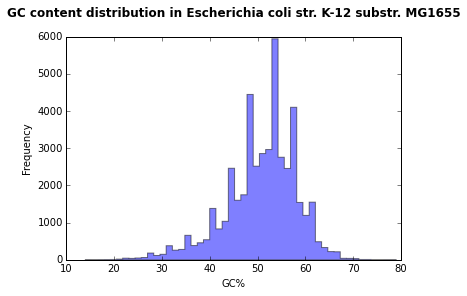

In [14]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
% matplotlib inline
fasta_sequences = SeqIO.parse(open("NC_000913_K12_MG1655.fasta"),'fasta')
for fasta in fasta_sequences:
        name = fasta.id # Header line
        ecoli_sequence =fasta.seq # Sequence
        values=[]
        for i in range(0, len(ecoli_sequence),100): #Calculating GC content for every 100 bp
                s = ecoli_sequence[i: i + 100] 
                ecoli_gc= GC_content(s)
                values.append(ecoli_gc)

plt.hist(values,bins=50,histtype='stepfilled',alpha=0.5)
plt.title("GC content distribution in Escherichia coli str. K-12 substr. MG1655\n", fontweight='bold')
plt.xlabel("GC%")
plt.ylabel("Frequency")
plt.show()